<p align="center">
    <a href="https://github.com/fmahe/fibermat">
        <img src="https://github.com/fmahe/fibermat/raw/main/images/banner.png">
    </a>
</p>

[![pypi version](https://img.shields.io/pypi/v/fibermat?logo=pypi)](https://pypi.org/project/fibermat/)
[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT)
[![François Mahé](https://img.shields.io/badge/Author-François%20Mahé-green)](https://img.shields.io/badge/francois.mahe@ens--rennes.fr-Univ%20Rennes,%20ENS%20Rennes,%20CNRS,%20IPR%20--%20UMR%206251,%20F--35000%20Rennes,%20France-blue)
[![GitHub Badge](https://img.shields.io/badge/Github-fmahe-blue?logo=github)](https://github.com/fmahe/fibermat)
[![Mail](https://img.shields.io/badge/Contact-francois.mahe@ens--rennes.fr-blue)](mailto:francois.mahe@ens-rennes.fr)

<details>
<summary>
<b> License <b/> <a name="license" />

</summary>

```
                                        ██╖
████████╖  ████┐  ████╖       ██╖      ██╓╜
██╔═════╝  ██╔██ ██╔██║       ██║    ██████╖
█████─╖    ██║ ███╓╜██║██████╖██████╖██║ ██║
██╔═══╝    ██║ ╘══╝ ██║██║ ██║██╓─██║██╟───╜
██║    ██┐ ██║      ██║███ ██║██║ ██║│█████╖
╚═╝    └─┘ ╚═╝      ╚═╝╚══╧══╝╚═╝ ╚═╝╘═════╝
 █████┐       █████┐       ██┐
██╔══██┐     ██╓──██┐      └─┘       █╖████╖
 ██╖ └─█████ └███ └─┘      ██╖██████╖██╔══█║
██╔╝  ██╔══██   ███╖ ████╖ ██║██║ ██║██║  └╜
│██████╓╜   ██████╓╜ ╚═══╝ ██║██████║██║
╘══════╝    ╘═════╝        ╚═╝██╔═══╝╚═╝
      Rennes                  ██║
                              ╚═╝
@author: François Mahé
@mail: francois.mahe@ens-rennes.fr
(Univ Rennes, ENS Rennes, CNRS, IPR - UMR 6251, F-35000 Rennes, France)

@project: FiberMat
@version: v1.0

License:
--------
MIT License

Copyright (c) 2024 François Mahé

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

Description:
------------
A mechanical solver to simulate fiber packing and perform statistical analysis.

References:
-----------
Mahé, F. (2023). Statistical mechanical framework for discontinuous composites:
  application to the modeling of flow in SMC compression molding (Doctoral
  dissertation, École centrale de Nantes).

```
</details>

**FiberMat** is a mechanical solver to simulate fiber packing and perform statistical analysis. It generates realistic 3D fiber mesostructures and computes internal forces and deformations.

This code is the result of thesis work that can be found in:
> [Mahé, F. (2023). Statistical mechanical framework for discontinuous composites:
  application to the modeling of flow in SMC compression molding (Doctoral
  dissertation, École centrale de Nantes).](https://theses.hal.science/tel-04189271/)

In [1]:
from widgets import PipButton

pipButton = PipButton(
    "ipywidgets",
    "fibermat",
    "matplotlib",
    "numpy",
    "pandas",
    "pyvista",
    "scipy",
    **{"scikit-learn": "sklearn"},
    tqdm="tqdm",
)
pipButton()

import fibermat
print(fibermat.__header__)

PipButton(description='Install packages', style=ButtonStyle())

Output()


████████╖██┐██╖                   ████┐  ████╖       ██╖
██╔═════╝└─┘██║    ██████╖█╖████╖ ██╔██ ██╔██║       ██║
█████─╖  ██╖██████╖██║ ██║██╔══█║ ██║ ███╓╜██║██████╖█████╖
██╔═══╝  ██║██║ ██║██╟───╜██║  └╜ ██║ ╘══╝ ██║██║ ██║██╔══╝
██║      ██║█████╓╜│█████╖██║     ██║      ██║███ ██║█████╖
╚═╝      ╚═╝╚════╝ ╘═════╝╚═╝     ╚═╝      ╚═╝╚══╧══╝╚════╝
 █████┐       █████┐       ██┐
██╔══██┐     ██╓──██┐      └─┘       █╖████╖
 ██╖ └─█████ └███ └─┘      ██╖██████╖██╔══█║
██╔╝  ██╔══██   ███╖ ████╖ ██║██║ ██║██║  └╜
│██████╓╜   ██████╓╜ ╚═══╝ ██║██████║██║
╘══════╝    ╘═════╝        ╚═╝██╔═══╝╚═╝
      Rennes                  ██║
                              ╚═╝



## 📦 Imports
<a name="imports" />

In [2]:
import numpy as np
import pyvista as pv
from IPython.display import display, HTML
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from tqdm import tqdm

from fibermat import *

## 🗹 Widgets
<a name="widgets" />

In [3]:
from widgets import *

if "matplotlibButton" not in globals():
    matplotlibButton = MatplotlibButton()

if "inputs" not in globals():
    inputs = Settings()

## ⚙️ Parameters
<a name="parameters" />

In [4]:
inputs(n=100, size=50, tensile=625, seed=0, periodic=True, threshold=10, lmin=0.01, coupling=0.99, packing=3, interp_size=100)
inputs()

IntText(value=100, description='N')

FloatText(value=25.0, description='LENGTH', step=5.0)

FloatText(value=1.0, description='WIDTH', step=1.0)

FloatText(value=1.0, description='THICKNESS', step=0.1)

FloatText(value=50.0, description='SIZE', step=10.0)

FloatSlider(value=1.0, description='THETA', max=1.0, readout_format='.1%', step=0.01)

Checkbox(value=True, description='PERIODIC')

FloatText(value=3.0, description='PACKING', step=0.5)

FloatLogSlider(value=1000.0, description='ITERMAX', max=6.0, readout_format='.0e', step=1.0)

FloatLogSlider(value=1e-06, description='TOL', max=-1.0, min=-10.0, readout_format='.0e', step=1.0)

FloatText(value=0.99, description='COUPLING', step=0.01)

Checkbox(value=True, description='VERBOSE')

In [5]:
pv.set_plot_theme('paraview')
pv.set_jupyter_backend('static')

## 📁 Files
<a name="files" />

In [6]:
!mkdir outputs

mkdir: impossible de créer le répertoire «outputs»: Le fichier existe


## 📚 Library
<a name="library" />

### 🧵 Mat(erial)
<a name="mat" />

**A fiber is defined by**:
+ its **dimensions** in 3 directions ($l, b, h$ with $l \gg b \geq h$).
+ the **position** of its center in space ($x, y, z$).
+ its **orientation** vector in space ($u, v, w$)[$^{[*]}$](note-1) (with $u^2 + v^2 + w^2 = 1$).
+ its **material properties** ($G$: shear modulus, $E$: tensile modulus)[$^{[**]}$](note-2).

The cross-section of the fiber is assumed to be ***elliptical***.

<a href="note-1"> [*] </a> No rotation of the fiber around its axis is considered:
> + for $w = 0$, the thickness $h$ is the dimension of the fiber aligned with the vertical direction $\vec{e}_Z$.
> + for $w \neq 0$, the direction of the fiber thickness forms an angle $\psi = \sin^{-1}(w)$ with respect to the vertical direction $\vec{e}_Z$.
>
> Fiber length is defined in the direction of the vector $(u, v, w)$. The width is defined in the remaining orthogonal direction.

<a href="note-2"> [**] </a> The material parameters are defined in the longitudinal direction of the fiber.

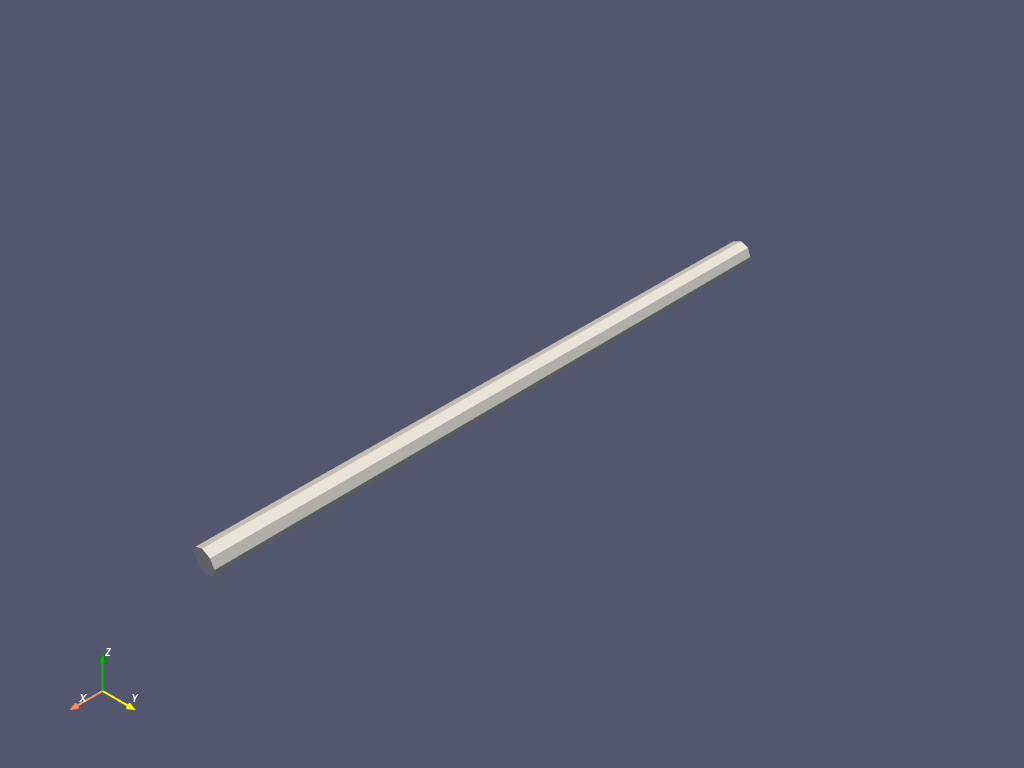

In [7]:
vtk_fiber(**inputs).plot()

**A mat is a set of randomly distributed fibers**.
By default, fibers are initialized with:
+ identical dimensions (*monodisperse population*)[$^{[*]}$](note-3).
+ uniform distriution of spatial positions.
+ uniform distribution of angular positions in the plane.
+ identical parameters (*homogeneous population*)

<a href="note-3"> [*] </a> The definition domain is a cube. Boundary conditions can be periodic or non-periodic.

In [8]:
# Mat?

,l,b,h,x,y,z,u,v,w,G,E
0,25.0,1.0,1.0,2.440675,8.890827,-24.338157,0.289366,0.957218,-0.0,1.0,625.0
1,25.0,1.0,1.0,10.759468,-11.499601,-24.178519,0.651721,0.758459,0.0,1.0,625.0
2,25.0,1.0,1.0,5.138169,11.759701,-23.967450,0.865730,-0.500512,-0.0,1.0,625.0
3,25.0,1.0,1.0,2.244159,23.109427,-23.766064,0.252040,-0.967717,0.0,1.0,625.0
4,25.0,1.0,1.0,-3.817260,-12.562343,-23.716864,0.957840,-0.287303,0.0,1.0,625.0
...,...,...,...,...,...,...,...,...,...,...,...
95,25.0,1.0,1.0,-15.840432,-0.477060,23.096819,0.128503,0.991709,-0.0,1.0,625.0
96,25.0,1.0,1.0,4.325647,-13.629269,23.645974,0.898537,-0.438898,-0.0,1.0,625.0
97,25.0,1.0,1.0,-23.994623,-12.282176,23.874757,0.900374,-0.435117,-0.0,1.0,625.0
98,25.0,1.0,1.0,16.447001,-22.098542,24.091469,0.051275,-0.998685,-0.0,1.0,625.0


MatplotlibButton(button_style='primary', description='%matplotlib inline', style=ButtonStyle())

100%|██████████████████████████████████████████████| 100/100 [00:00<00:00, 272.74it/s]


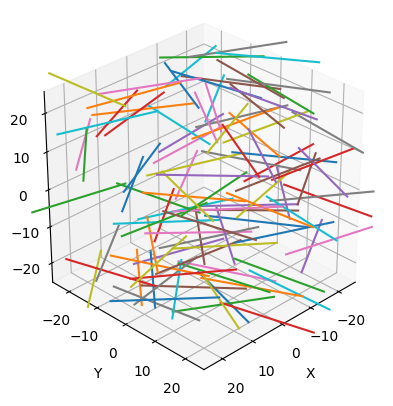

In [9]:
### Generate a set of fibers

# Generate a set of fibers
mat = Mat(**inputs)

display(mat)

# ~~~ Figure ~~~ #
matplotlibButton()

fig, ax = plt.subplots(subplot_kw=dict(projection='3d', aspect='equal',
                                       xlabel="X", ylabel="Y", zlabel="Z"))
ax.view_init(azim=45, elev=30, roll=0)
if len(mat):
    # Draw fibers
    for i in tqdm(range(len(mat))):
        fiber = mat.iloc[i]
        A = fiber[[*"xyz"]].values - 0.5 * fiber.l * fiber[[*"uvw"]].values
        B = fiber[[*"xyz"]].values + 0.5 * fiber.l * fiber[[*"uvw"]].values
        plt.plot(*np.c_[A, B])
    ax.set_xlim(-0.5 * mat.attrs["size"], 0.5 * mat.attrs["size"])
    ax.set_ylim(-0.5 * mat.attrs["size"], 0.5 * mat.attrs["size"])
plt.show()

### 🕸️ Net(work)
<a name="net">

A **network** is created to define future mechanical interactions between fibers.
The creation of the network allows us to define more precisely the ***entanglement of the fibers*** (organization of the fibers, textile structure, periodicity conditions, etc.).

+ For each pair of fibers, we calculate the position of the closest **nodes** by solving the equation:
$$
    \mathbb{U} \mathbb{U}^T \cdot \vec{R} = \mathbb{U} \cdot \vec{r}
$$
where $\mathbb{U} = \left[\begin{matrix} \vec{u}_A \end{matrix}\right]$ is a matrix of size (2, 3) whose rows are the orientation vectors of each fiber and $\vec{r} = \vec{X}_B - \vec{X}_A $ is the oriented distance between the two fibers.

    The solution vector $\vec{R} = \left(\begin{matrix} -s_A \\ s_B \end{matrix}\right)$ gives the positions $s_A$ and $s_B$ of the nearest points belonging to each of the two fibers.

+ A pair of nodes defines a **connection** and is used to specify the relative positions of the two fibers. Each connection is uniquely identified by the two fibers concerned and the curvilinear abscissas of the nodes along each fiber.

In [10]:
# Net?

,A,B,sA,sB,xA,yA,zA,xB,yB,zB
0,0,0,12.500000,-12.500000,6.057752,20.856058,-24.338157,-1.176401,-3.074404,-24.338157
1,0,2,3.938063,-1.799582,3.580217,12.660413,-24.338157,3.580217,12.660413,-23.967450
2,0,3,6.509881,8.253676,4.324414,15.122205,-24.338157,4.324414,15.122205,-23.766064
3,0,5,0.269800,-7.165082,2.518746,9.149084,-24.338157,2.518746,9.149084,-21.802237
4,0,6,-10.466114,6.264470,-0.587864,-1.127531,-24.338157,-0.587864,-1.127531,-21.637518
...,...,...,...,...,...,...,...,...,...,...
862,95,95,12.500000,-12.500000,-14.234141,11.919304,23.096819,-17.446723,-12.873423,23.096819
863,96,96,12.500000,-12.500000,15.557356,-19.115497,23.645974,-6.906063,-8.143040,23.645974
864,97,97,12.500000,-12.500000,-12.739951,-17.721142,23.874757,-35.249295,-6.843209,23.874757
865,98,98,12.500000,-12.500000,17.087939,-34.582099,24.091469,15.806064,-9.614985,24.091469


MatplotlibButton(button_style='primary', description='%matplotlib inline', style=ButtonStyle())

100%|██████████████████████████████████████████████| 867/867 [00:00<00:00, 901.99it/s]


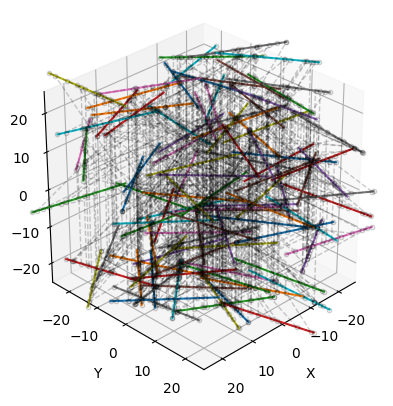

In [11]:
### Build the fiber network

# Generate a set of fibers
mat = Mat(**inputs)
# Build the fiber network
net = Net(mat, **inputs)

display(net)

# Get node data
points = net[["xA", "yA", "zA", "xB", "yB", "zB"]].values.reshape(-1, 2, 3)

# ~~~ Figure ~~~ #
matplotlibButton()

fig, ax = plt.subplots(subplot_kw=dict(projection='3d', aspect='equal',
                                       xlabel="X", ylabel="Y", zlabel="Z"))
ax.view_init(azim=45, elev=30, roll=0)
if len(mat):
    # Draw fibers
    for i in tqdm(range(len(mat))):
        fiber = mat.iloc[i]
        A = fiber[[*"xyz"]].values - 0.5 * fiber.l * fiber[[*"uvw"]].values
        B = fiber[[*"xyz"]].values + 0.5 * fiber.l * fiber[[*"uvw"]].values
        plt.plot(*np.c_[A, B])
if len(net):
    # Draw nodes
    for point in tqdm(points):
        plt.plot(*point.T, '--ok', lw=1, mfc='none', ms=3, alpha=0.2)
ax.set_xlim(-0.5 * net.attrs["size"], 0.5 * net.attrs["size"])
ax.set_ylim(-0.5 * net.attrs["size"], 0.5 * net.attrs["size"])
plt.show()

From the network, a **stack** of fibers is formed by dropping the fibers by gravity onto a flat floor.

It is assumed that the fibers are initially in the plane, and that they fall by vertical translation only. Rotations by tilting are not considered. The creation of the stack is formalized as a linear programming problem:
$$
        \min_{\mathbf{z}}(-\mathbf{f} \cdot \mathbf{z}) \quad s.t. \quad \mathbb{C} \, \mathbf{z} \leq \mathbf{H} \quad and \quad \mathbf{z} \geq \mathbf{h} / 2
$$
$$
    with \quad \mathbf{f} = -\mathbf{m} \, g \quad and \quad \mathbf{h} > 0
$$
where $\mathbf{f}$ is the vector of fiber weights, $\mathbf{z}$ is the unknown vector of fiber vertical positions and $\mathbf{f}$ is the vector of fiber thicknesses. The matrix $\mathbb{C}$ is the matrix of inequality constraints that positions must satisfy to prevent the fibers from crossing each other. The vector $-\mathbf{H}$ corresponds to the minimum distances between the pairs of fibers. The condition of non-penetration between two fibers gives the expression of each condition found in the rows of $\mathbb{C}$ and $\mathbf{H}$:
$$
    z_B - z_A \geq \frac{1}{2} \, (h_A + h_B) \quad \Leftrightarrow \quad z_A - z_B \leq - \, \frac{1}{2} \, (h_A + h_B)
$$

Solving the constrained optimization problem gives access to the contact forces and the resultants of the forces applied to each fiber.

In [12]:
# Stack?

MatplotlibButton(button_style='primary', description='%matplotlib inline', style=ButtonStyle())

100%|███████████████████████████████████████████████| 94/94 [00:00<00:00, 1084.21it/s]


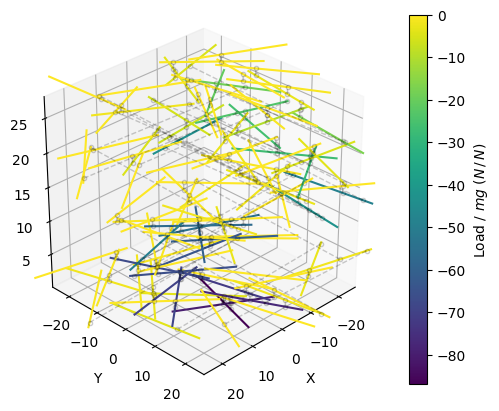

In [13]:
# Generate a set of fibers
mat = Mat(**inputs)
# Build the fiber network
net = Net(mat, **inputs)
# Stack fibers
stack = Stack(mat, net, thresold=None)

C_, f_, H_, h_ = Stack.constraint(mat, net)
linsol = Stack.solve(mat, net)

# Contact force
force = linsol.ineqlin.marginals
# Normalize by fiber weight
force /= np.pi / 4 * mat[[*"lbh"]].prod(axis=1).mean()
# Resulting force
load = 0.5 * force @ np.abs(C_) + 0.5 * force @ C_
color = interp1d([np.min(load), np.max(load)], [0, 1])

points = (stack[stack.A < stack.B][["xA", "yA", "zA", "xB", "yB", "zB"]]
          .values.reshape(-1, 2, 3))

# Figure
matplotlibButton()

fig, ax = plt.subplots(subplot_kw=dict(projection='3d', aspect='equal',
                                       xlabel="X", ylabel="Y", zlabel="Z"))
ax.view_init(azim=45, elev=30, roll=0)
# Draw fibers
for i in tqdm(range(len(mat))):
    fiber = mat.iloc[i]
    A = fiber[[*"xyz"]].values - 0.5 * fiber.l * fiber[[*"uvw"]].values
    B = fiber[[*"xyz"]].values + 0.5 * fiber.l * fiber[[*"uvw"]].values
    plt.plot(*np.c_[A, B], c=plt.cm.viridis(color(load[i])))
# Draw contacts
for point in tqdm(points[~np.isclose(force, 0)]):
    plt.plot(*point.T, '--ok', lw=1, mfc='none', ms=3, alpha=0.2)
ax.set_xlim(-0.5 * mat.attrs["size"], 0.5 * mat.attrs["size"])
ax.set_ylim(-0.5 * mat.attrs["size"], 0.5 * mat.attrs["size"])
# Color bar
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=np.min(load), vmax=np.max(load))
smap = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(smap, ax=ax)
cbar.set_label("Load / $mg$ ($N\,/\,N$)")
plt.show()

### 📐 Mesh
<a name="mesh" />

The **mesh** represents the ***discontinuous structure*** of the set of fibers. It groups all network connections and organizes them by fiber to define:
+ beam elements linking two adjacent nodes along the same fiber.
+ constraint elements linking two nodes connected between two different fibers.

In [14]:
# Mesh?

fiber          s          x          y     z  beam  constraint
fiber                                                                     
0     0         0 -12.500000  -1.176401  -3.074404   0.5     1           0
      1         0 -10.466114  -0.587864  -1.127531   0.5     2          58
      2         0  -2.947313   1.587823   6.069604   0.5     3         242
      3         0  -1.655929   1.961505   7.305741   0.5     4         276
      4         0   0.269800   2.518746   9.149084   0.5     5          44
...           ...        ...        ...        ...   ...   ...         ...
99    1063     99   3.366705 -22.914775  -6.091735  26.5  1064         754
      1064     99   6.159453 -21.379789  -8.424815  26.5  1065         684
      1065     99   7.284437 -20.761462  -9.364634  26.5  1066         810
      1066     99  11.270660 -18.570503 -12.694751  26.5  1067         986
      1067     99  12.500000 -17.894817 -13.721749  26.5  1060        1067

[1068 rows x 7 columns]

MatplotlibButton(button_style='primary', description='%matplotlib inline', style=ButtonStyle())

100%|████████████████████████████████████████████| 1068/1068 [00:03<00:00, 315.63it/s]


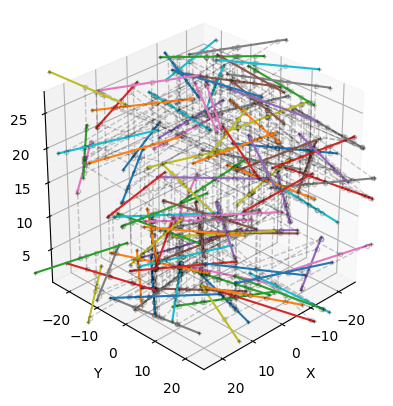

In [16]:
### Create the fiber mesh

# Generate a set of fibers
mat = Mat(**inputs)
# Build the fiber network
net = Net(mat, **inputs)
# Stack fibers
stack = Stack(mat, net, **inputs)
# Create the fiber mesh
mesh = Mesh(stack)

display(mesh.groupby(by="fiber").apply(lambda x: x))

# ~~~ Figure ~~~ #
matplotlibButton()

fig, ax = plt.subplots(subplot_kw=dict(projection='3d', aspect='equal',
                                       xlabel="X", ylabel="Y", zlabel="Z"))
ax.view_init(azim=45, elev=30, roll=0)
for i, j, k in tqdm(zip(mesh.index, mesh.beam, mesh.constraint),
                    total=len(mesh)):
    a, b, c = mesh.iloc[[i, j, k]][[*"xyz"]].values
    if mesh.iloc[i].s < mesh.iloc[j].s:
        # Draw intra-fiber connections
        plt.plot(*np.c_[a, b],
                 c=plt.cm.tab10(mesh.fiber.iloc[i] % 10))
    if mesh.iloc[i].z < mesh.iloc[k].z:
        # Draw inter-fiber connections
        plt.plot(*np.c_[a, c], '--ok',
                 lw=1, mfc='none', ms=3, alpha=0.2)
    if mesh.iloc[i].fiber == mesh.iloc[k].fiber:
        # Draw fiber end nodes
        plt.plot(*np.c_[a, c], '+k', ms=3, alpha=0.2)
ax.set_xlim(-0.5 * mesh.attrs["size"], 0.5 * mesh.attrs["size"])
ax.set_ylim(-0.5 * mesh.attrs["size"], 0.5 * mesh.attrs["size"])
plt.show()

Create VTK mat: 100%|██████████████████████████████| 100/100 [00:00<00:00, 239.72it/s]


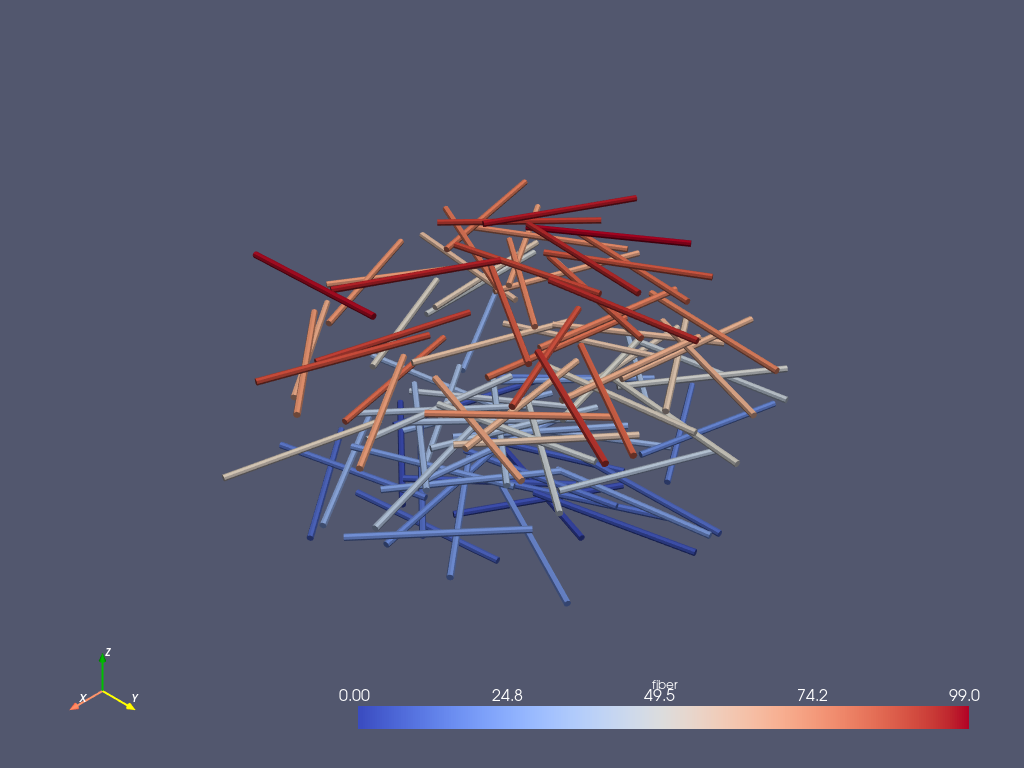

In [17]:
vtk_mat(mat).plot()

## 💻 Code
<a name="code" />

Once the fiber stacking is done and the mesh defined, we can formulate the fibrous network compaction problem in terms of energy as follows:
$$
    \min_{\mathbf{u}, \mathbf{f}} \left( \frac{1}{2} \, \mathbf{u} \, \mathbb{K} \, \mathbf{u} - \mathbf{F} \, \mathbf{u} - \mathbf{f} \, (\mathbf{H} - \mathbb{C} \, \mathbf{u}) \right)
    \quad s.t. \quad \mathbb{C} \, \mathbf{u} \leq \mathbf{H} \, , \quad \mathbf{u} \leq 0 \, , \quad \mathbf{f} \geq 0 \quad and \quad \mathbf{f} \, (\mathbf{H} - \mathbb{C} \, \mathbf{u}) = 0
$$
where:
+ $\mathbf{u}$ is the vector of generalized displacements (unknowns of the problem).
+ $\mathbf{f}$ is the vector of generalized forces (unknowns Lagrange multipliers).
+ $\mathbb{K}$ is the stiffness matrix of the fiber set.
+ $\mathbf{F}$ is the vector of external efforts.
+ $\mathbb{C}$ is the constraints matrix (non-penetration conditions).
+ $\mathbf{H}$ is the vector of distances between fibers (minimal distances).

The mechanical equilibrium allows reformulating the problem as a system of inequalities:
$$
    \Rightarrow \quad \left[\begin{matrix} \mathbb{K} & \mathbb{C}^T \\ \mathbb{C} & 0 \end{matrix}\right] \binom{\mathbf{u}}{\mathbf{f}} \leq \binom{\mathbf{F}}{\mathbf{H}}
$$

### 🔧 Model
<a name="model" />

The behavior model assembles stiffness and constraint matrices based on material data and mesh.

+ The mechanical model is built using a **Timoshenko beam law**:
    $$
        \mathbb{K}_e = \frac{Gbh}{l_e} \cdot \frac{\pi / 4}{1 + \frac{G}{E} \left( \frac{l_e}{h} \right)^2}
            \left[\begin{matrix}
                1  &  l_e / 2  &  -1  &  l_e / 2  \\
                l_e / 2  &  {l_e}^2 / 3 + \frac{E}{G} h^2  &  -l_e / 2  &  {l_e}^2 / 6 - \frac{E}{G} h^2  \\
               -1  &  -l_e / 2  &  1  &  -l_e / 2  \\
                l_e / 2  &  {l_e}^2 / 6 - \frac{E}{G} h^2  &  -l_e / 2  &  {l_e}^2 / 3 + \frac{E}{G} h^2  \\
            \end{matrix}\right]
            \ , \quad \mathbf{F}_e =
            \left(\begin{matrix}
                0 \\
                0 \\
                0 \\
                0 \\
            \end{matrix}\right)
    $$
    where $l_e$ is the length of the beam element, $E$ is Young's modulus, $G$ is the shear modulus, $b$ and $h$ are the width and thickness of the fiber.

    The displacement vector $\mathbf{u} = (\dots, u_i, \theta_i, \dots)$ (with $u_i$ being the vertical displacement of node $i$ and $\theta_i$ the rotation of the cross-section) satisfies ***mechanical equilibrium***:
    $$
        \mathbb{K} \, \mathbf{u} = \mathbf{F}
    $$

+ The contact model is built using a **normal non-penetration condition**:
    $$
        \mathbb{C}_e =
            \left[\begin{matrix}
                 -1  &  0  &  0  &  0  \\
                  1  &  0  & -1  &  0  \\
                  0  &  0  &  1  &  0  \\
            \end{matrix}\right]
            \ , \quad \mathbf{H}_e =
            \left(\begin{matrix}
                z_A - \frac{1}{2} \, h_A \\
                z_B - z_A - \frac{1}{2} \, (h_A + h_B) \\
                Z - z_B - \frac{1}{2} \, h_B \\
            \end{matrix}\right)
    $$
    which allows verifying the inequalities:
    $$
        \mathbb{C} \, \mathbf{u} \leq \mathbf{H}
    $$

In [18]:
# stiffness?

In [19]:
# constraint?

9.028794256608082e-14


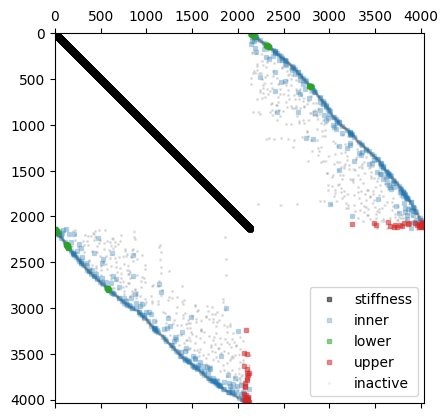

In [20]:
### Display the system of inequations

mat = Mat(**inputs)
net = Net(mat, **inputs)
stack = Stack(mat, net, **inputs)
mesh = Mesh(stack)

K, u, F, du, dF = stiffness(mat, mesh, **inputs)
C, f, H, df, dH = constraint(mat, mesh, **inputs)
plot_system(K, u, F, du, dF, C, f, H, df, dH)
plt.show()

### 🧩 Solver
<a name="solver" />

We solve the quadratic minimization problem subject to linear constraints using an **Updated Lagrangian** approach:
$$
    \min_{\mathbf{u}, \mathbf{f}} \left( \frac{1}{2} \, \mathbf{u} \, \mathbb{K} \, \mathbf{u} - \mathbf{F} \, \mathbf{u} - \mathbf{f} \, (\mathbf{H} - \mathbb{C} \, \mathbf{u}) \right)
    \quad s.t. \quad \mathbb{C} \, \mathbf{u} \leq \mathbf{H} \, , \quad \mathbf{u} \leq 0 \, , \quad \mathbf{f} \geq 0 \quad and \quad \mathbf{f} \, (\mathbf{H} - \mathbb{C} \, \mathbf{u}) = 0
$$

For an infinitesimal perturbation, the contact network remains unchanged, and mechanical equilibrium is expressed by a set of equations:
$$
    \Rightarrow \quad \left[\begin{matrix} \mathbb{K} & \mathbb{C}^{*T} \\ \mathbb{C}^* & 0 \end{matrix}\right] \binom{\delta \mathbf{u}}{\delta \mathbf{f}} = \binom{\delta \mathbf{F}}{\delta \mathbf{H}^*}
$$
where $\mathbb{C}^*$ and $\mathbf{H}^*$ correspond to the rows of $\mathbb{C}$ and $\mathbf{H}$ for which there is contact: $\mathbb{C}^* \, \mathbf{u} = \mathbf{H}^*$.

Solving this linear system allows expressing the evolution of unknowns in terms of a global parameter $U$, the displacement of the upper wall that compacts the fiber stack.

Knowing the infinitesimal displacements, we can calculate the displacement increment $\delta U$ necessary to create a new contact in the fiber network:

+ Compute the vector of node-to-node distances: $\mathbf{d} = \mathbf{H} - \mathbb{C} \, \mathbf{u} \geq 0$
+ Calculate the vector of pseudo-velocities between nodes: $\mathbf{v} = \frac{d\mathbf{H}}{dU} - \mathbb{C} \, \frac{d\mathbf{u}}{dU} \geq 0$

The next displacement is then: $dU = -\min(\mathbf{d} / \mathbf{v}) \leq 0$.

In [21]:
# solver?

Packing: 3.0:   9%|██▊                             | 87/1000 [00:00<00:07, 127.33it/s]


9.028794256608082e-14
6.21585254338553e-13


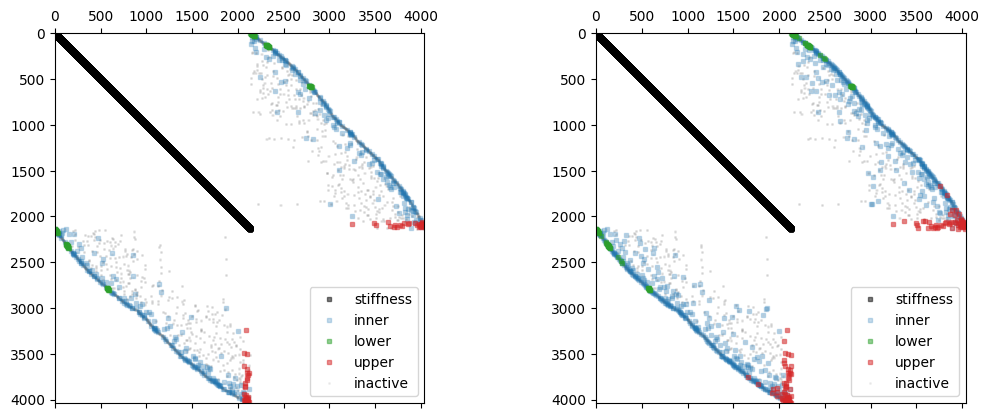

In [22]:
### Solve the mechanical packing problem

# Generate a set of fibers
mat = Mat(**inputs)
# Build the fiber network
net = Net(mat, **inputs)
# Stack fibers
stack = Stack(mat, net, **inputs)
# Create the fiber mesh
mesh = Mesh(stack)

K, u, F, du, dF = stiffness(mat, mesh, **inputs)
C, f, H, df, dH = constraint(mat, mesh, **inputs)

# Solve the mechanical packing problem
K, C, u, f, F, H, Z, rlambda, mask, err = solver(mat, mesh, **inputs)

fig, ax = plt.subplots(1, 2, figsize=(2 * 6.4, 4.8))
plot_system(K, u(0), F(0), du, dF, C, f(0), H(0), df, dH, ax=ax[0])
plot_system(K, u(1), F(1), du, dF, C, f(1), H(1), df, dH, ax=ax[1])
plt.show()

### 🌐 Render
<a name="render" />

In [23]:
# vtk_mesh?

Create VTK mat: 100%|██████████████████████████████| 100/100 [00:00<00:00, 138.33it/s]


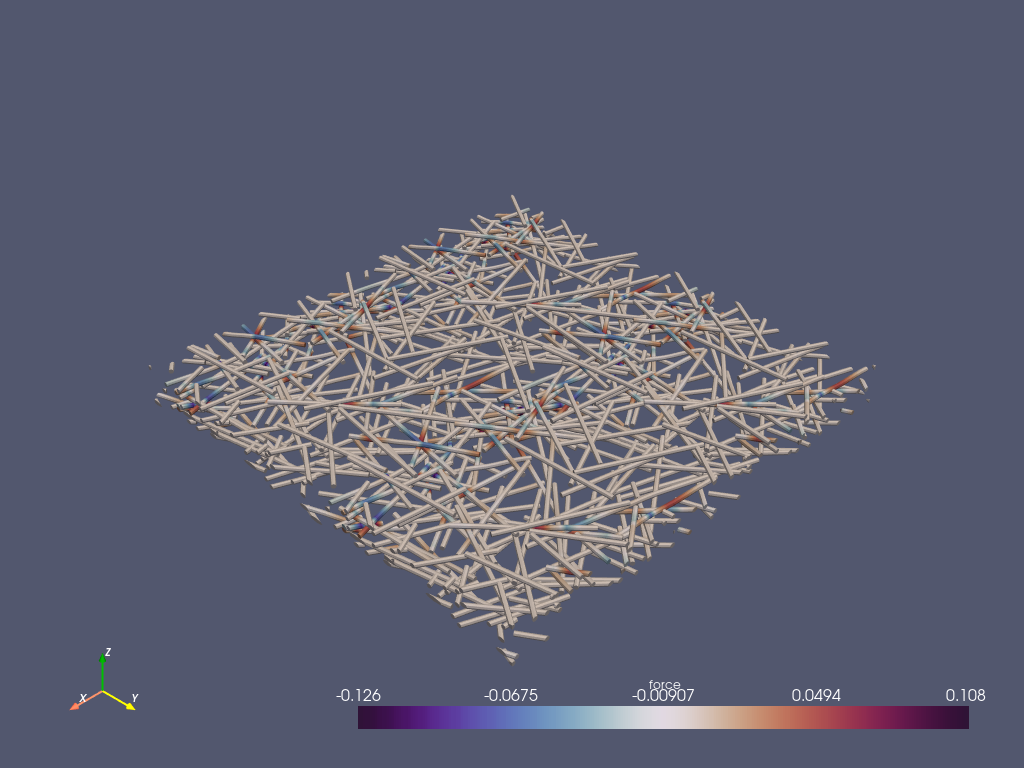

In [24]:
vtk = vtk_mesh(mat, mesh, *u(1).reshape(-1, 2).T, *(f(1) @ C).reshape(-1, 2).T)
vtk.plot(scalars="force", cmap=plt.cm.twilight_shifted)
vtk.save("outputs/vtk.vtk")